hybrid_day3: only run 10 mins
hybrid2 [5,99], hybrid_small_window_20_80, hybrid_small_window_30_70: on day3, 200 mins
hybrid_no_PW_99th: on day3, 100mins, 0 pre-warm
hybrid_40_100: on day3, 100mins, 40% prewarm, 100% keep alive

In [22]:
import numpy as np
import matplotlib.pyplot as plt
hybrid_test = np.load('../result/hybrid_test.npz')
hybrid = np.load('../result/hybrid_day3.npz')
hybrid2 = np.load('../result/hybrid2.npz')
hybrid_20 = np.load('../result/hybrid_small_window_20_80.npz')
hybrid_30 = np.load('../result/hybrid_small_window_30_70.npz')
hybrid_no_PW_99th = np.load('../result/hybrid_no_PW_99th.npz')
hybrid_40_100 = np.load('../result/hybrid_40_100.npz')

keep_test = np.load('../result/keep_test.npz')
keep_alive = np.load('../result/keep_alive_day3.npz')
keep_alive2 = np.load('../result/keep2.npz')

In [23]:
cold_hybrid, waste_hybrid = hybrid["cold_start"], hybrid["waste_memory_time"]
cold_hybrid_test, waste_hybrid_test = hybrid_test["cold_start"], hybrid_test["waste_memory_time"]
cold_hybrid2, waste_hybrid2 = hybrid2["cold_start"], hybrid2["waste_memory_time"]
cold_hybrid20, waste_hybrid20 = hybrid_20["cold_start"], hybrid_20["waste_memory_time"]
cold_hybrid30, waste_hybrid30 = hybrid_30["cold_start"], hybrid_30["waste_memory_time"]
cold_hybrid_no_PW, waste_hybrid_no_PW = hybrid_no_PW_99th["cold_start"], hybrid_no_PW_99th["waste_memory_time"]
cold_hybrid_40, waste_hybrid_40 = hybrid_40_100["cold_start"], hybrid_40_100["waste_memory_time"]


cold_keep_alive_test, waste_keep_alive_test = keep_test["cold_start"], keep_test["waste_memory_time"]
cold_keep_alive, waste_keep_alive = keep_alive["cold_start"], keep_alive["waste_memory_time"]
cold_keep_alive2, waste_keep_alive2 = keep_alive2["cold_start"], keep_alive2["waste_memory_time"]

In [24]:
waste_keep_alive_test.sum()

15740.0

In [25]:
waste_hybrid_test.sum()

15130.0

(array([0.02553191, 0.06170213, 0.28085106, 0.3106383 , 0.37021277,
        0.4       , 0.43829787, 0.52978723, 0.59148936, 1.        ]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 1 Patch objects>)

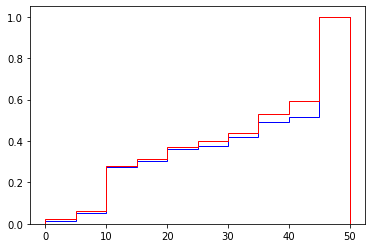

In [27]:
plt.hist(waste_keep_alive_test, cumulative=True, histtype='step', density=True, color='b')
plt.hist(waste_hybrid_test, cumulative=True, histtype='step', density=True, color='red')

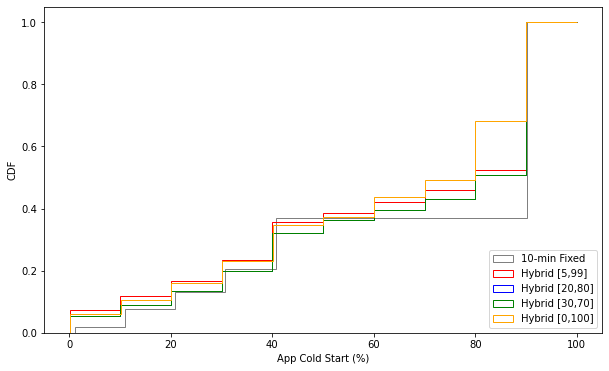

In [180]:
# plt.hist(cold_keep_alive, cumulative=True, histtype='step', density=True, color='b')
plt.figure(figsize=(10,6))
_, _, patches0=plt.hist(cold_keep_alive2, cumulative=True, histtype='step', density=True, color='grey')
_, _, patches1=plt.hist(cold_hybrid2, cumulative=True, histtype='step', density=True, color='red')
_, _, patches2=plt.hist(cold_hybrid20, cumulative=True, histtype='step', density=True, color='blue')
_, _, patches3=plt.hist(cold_hybrid30, cumulative=True, histtype='step', density=True, color='green')
_, _, patches4=plt.hist(cold_hybrid_no_PW, cumulative=True, histtype='step', density=True, color='orange')
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
patches3[0].set_xy(patches3[0].get_xy()[:-1])
patches4[0].set_xy(patches4[0].get_xy()[:-1])
plt.xlabel("App Cold Start (%)")
plt.ylabel("CDF")
plt.legend(["10-min Fixed", "Hybrid [5,99]", "Hybrid [20,80]", "Hybrid [30,70]","Hybrid [0,100]"],loc=4)
plt.savefig('../exp/cold_start_hybrid.pdf')

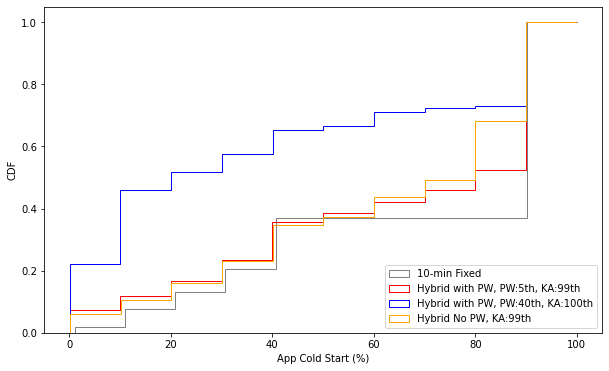

In [179]:
plt.figure(figsize=(10,6))
_, _, patches0=plt.hist(cold_keep_alive2, cumulative=True, histtype='step', density=True, color='grey')
_, _, patches1=plt.hist(cold_hybrid2, cumulative=True, histtype='step', density=True, color='red')
_, _, patches2=plt.hist(cold_hybrid_40, cumulative=True, histtype='step', density=True, color='blue')
_, _, patches4=plt.hist(cold_hybrid_no_PW, cumulative=True, histtype='step', density=True, color='orange')
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
patches4[0].set_xy(patches4[0].get_xy()[:-1])
plt.xlabel("App Cold Start (%)")
plt.ylabel("CDF")
plt.legend(["10-min Fixed", "Hybrid with PW, PW:5th, KA:99th", "Hybrid with PW, PW:40th, KA:100th","Hybrid No PW, KA:99th"],loc=4)
plt.savefig('../exp/cold_start_hybrid_optimal_para.pdf')

In [137]:
WMT_0_100 = waste_hybrid_no_PW.sum()/100

WMT_5_99 = waste_hybrid2.sum()/200/WMT_0_100
WMT_20_80 = waste_hybrid20.sum()/200/WMT_0_100
WMT_30_70 = waste_hybrid30.sum()/200/WMT_0_100
WMT_40_100 = waste_hybrid_40.sum()/100/WMT_0_100

In [155]:
waste_hist = [1,WMT_5_99,WMT_20_80,WMT_30_70,WMT_40_100]
x_label = ['Hybrid\n[0,100]','Hybrid\n[5,99]','Hybrid\n[20,80]','Hybrid\n[30,70]','Hybrid\n[40,100]']
color=['deepskyblue','deepskyblue','deepskyblue','deepskyblue','orchid']

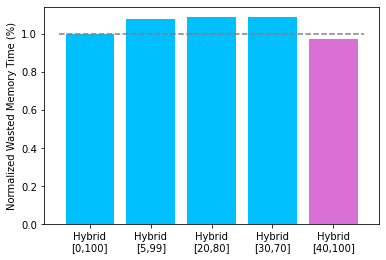

In [166]:
x=np.arange(len(waste_hist))
plt.xticks(x, x_label)
plt.bar(x, waste_hist, color=color)
plt.hlines(1.0, -0.5, 4.5, colors = "grey", linestyles = "dashed")
plt.ylabel("Normalized Wasted Memory Time (%)")
plt.savefig('../exp/waste_memory_time.pdf')

In [20]:
import pandas as pd
df = pd.read_csv('data/app_invocation.csv')

In [21]:
df.shape 

(45412, 1452)

In [ ]:
def sample_invocation(df, invocation_nums=200):
    df['invocation_sum'] = df[[str(i) for i in range(1,1440)]].sum(axis=1)
    return df[df['invocation_sum']<=200]    # 45412-14736 (<200 times)

In [16]:
df['invocation_sum'] = df[[str(i) for i in range(1,1440)]].sum(axis=1)

In [19]:
df[df['invocation_sum']>200]

,Unnamed: 0,HashOwner,HashApp,HashFunction,Trigger,1,2,3,4,5,...,1439,1440,day,AverageMem,AverageAllocatedMb_pct1,AverageAllocatedMb_pct100,AverageDuration,MinimumDuration,MaximumDuration,invocation_sum
0,0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,0,0,0,1,0,...,0,0,3,105,101,108,48,11.0,4183.0,287
2,2,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,0d0ac65651f54ae3285a59564d64e39238b516fa1d5b56...,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,0,0,0,1,0,...,0,0,3,117,116,121,29,11.0,86.0,287
12,12,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,33429bc85e5fc1a07053b627f7055c0d37300da4db44aa...,http,0,0,0,0,0,...,0,0,3,152,128,165,11,3.0,293.0,429
17,17,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,4b514f1006624660b978550c53392657f9b37bbaf2c1dd...,http,0,0,0,0,0,...,0,0,3,152,128,165,20,3.0,317.0,555
20,20,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,b83b1aab2caeed6ea8fb204f414856fb2a8dd5a8856354...,http,0,0,1,0,0,...,1,0,3,152,128,165,14,1.0,209.0,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45367,45367,4b07ef8fa03074fc47219919c1bbd1bcfc435b24c87734...,9b071107a16865bebaf74d9ca0dd439616eb662bc865be...,a14fadda5222605389b04dcf1f5c038f700f2f559442f8...,timer,12,12,12,12,12,...,12,12,3,109,109,110,3,0.0,2057.0,17268
45391,45391,4b07ef8fa03074fc47219919c1bbd1bcfc435b24c87734...,2206ae3de14a822948574497c138c53d7793a255b4cc2b...,abe2603fa7e5cbf69d4add04c827516746b1777839c728...,timer,10,10,10,10,10,...,10,10,3,136,109,165,2,0.0,4008.0,14382
45392,45392,4b07ef8fa03074fc47219919c1bbd1bcfc435b24c87734...,c5b2190bf9603f1f53961da4604bdd8ce84270add18bcb...,b97a50e2c0d14d85bcd0011b19f17994e5850f1dc84c59...,timer,10,10,10,10,10,...,10,10,3,110,110,111,3,0.0,2011.0,14390
45401,45401,1bef929a8359f486b6fa1498c5ff6592f624d29a38df5e...,34a55f66ecb378c960b558218269520a940ffa0f74c96c...,0390102b410f7d3abfaea5e30493b4b96c39b66cab4e35...,timer,1,0,0,1,0,...,0,0,3,113,113,113,218,171.0,484.0,480
